## Amirreza Hosseini
**9820363**

Introduction to Data Mining
HomeWork 2 <br>
Q7

In [1]:
import pandas as pd

1-read the csv file and store it in a dataframe and show the Data frame <br/>
PreProcessing:

In [2]:
titanic = pd.read_csv('./titanic.csv', sep=',')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isna().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic = titanic.dropna()

titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [5]:
titanic.isna().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [6]:
titanic = titanic.drop(['Parch', 'SibSp', 'Ticket', 'Name', 'PassengerId','Cabin'], axis=1)
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked
1,1,1,female,38.0,71.2833,C
3,1,1,female,35.0,53.1000,S
6,0,1,male,54.0,51.8625,S
10,1,3,female,4.0,16.7000,S
11,1,1,female,58.0,26.5500,S
...,...,...,...,...,...,...
871,1,1,female,47.0,52.5542,S
872,0,1,male,33.0,5.0000,S
879,1,1,female,56.0,83.1583,C
887,1,1,female,19.0,30.0000,S


In [7]:
titanic = pd.get_dummies(titanic, columns=['Sex','Embarked'])

titanic

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.0,71.2833,1,0,1,0,0
3,1,1,35.0,53.1000,1,0,0,0,1
6,0,1,54.0,51.8625,0,1,0,0,1
10,1,3,4.0,16.7000,1,0,0,0,1
11,1,1,58.0,26.5500,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
871,1,1,47.0,52.5542,1,0,0,0,1
872,0,1,33.0,5.0000,0,1,0,0,1
879,1,1,56.0,83.1583,1,0,1,0,0
887,1,1,19.0,30.0000,1,0,0,0,1


In [8]:
#every columns to x except 'Survived' column
Y = titanic['Survived']
X = titanic.drop(['Survived'],axis=1)

2- Split the data for 30% of test and 70% of train

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (128, 8)
The shape of X_test is: (55, 8)
The shape of Y_train is: (128,)
The shape of Y_test is: (55,)


3- Use it in MLP classifier without standardization

In [10]:
#create standard MLP classifier
from sklearn.neural_network import MLPClassifier

model =  MLPClassifier()
model.fit(X_train, Y_train)

#calculate accuracy of model for training data
from sklearn.metrics import accuracy_score, precision_score
Y_pred_train = model.predict(X_train)
print("Accuracy of model for training data: ",accuracy_score(Y_train,Y_pred_train))
print("Precision of model for training data: ",precision_score(Y_train,Y_pred_train))

#calculate accuracy of model for testing data
Y_pred_test = model.predict(X_test)
print("Accuracy of model for testing data: ",accuracy_score(Y_test,Y_pred_test))
print("Precision of model for testing data: ",precision_score(Y_test,Y_pred_test))

Accuracy of model for training data:  0.6953125
Precision of model for training data:  0.6953125
Accuracy of model for testing data:  0.6181818181818182
Precision of model for testing data:  0.6181818181818182


4- test 4 approaches of standardization of data and the effect of it in accuracy

In [11]:
#standardize the model with standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

model =  MLPClassifier()
model.fit(X_train_std, Y_train)

#calculate accuracy of model for training data
from sklearn.metrics import accuracy_score, precision_score
Y_pred_train = model.predict(X_train_std)
print("Accuracy of model for training data: ",accuracy_score(Y_train,Y_pred_train))
print("Precision of model for training data: ",precision_score(Y_train,Y_pred_train))

#calculate accuracy of model for testing data
Y_pred_test = model.predict(X_test_std)
print("Accuracy of model for testing data: ",accuracy_score(Y_test,Y_pred_test))
print("Precision of model for testing data: ",precision_score(Y_test,Y_pred_test))

Accuracy of model for training data:  0.8203125
Precision of model for training data:  0.8837209302325582
Accuracy of model for testing data:  0.6909090909090909
Precision of model for testing data:  0.7297297297297297


c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
#standardize the model with minmax scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

model =  MLPClassifier()
model.fit(X_train_std, Y_train)

#calculate accuracy of model for training data
from sklearn.metrics import accuracy_score, precision_score
Y_pred_train = model.predict(X_train_std)
print("Accuracy of model for training data: ",accuracy_score(Y_train,Y_pred_train))
print("Precision of model for training data: ",precision_score(Y_train,Y_pred_train))

#calculate accuracy of model for testing data
Y_pred_test = model.predict(X_test_std)
print("Accuracy of model for testing data: ",accuracy_score(Y_test,Y_pred_test))
print("Precision of model for testing data: ",precision_score(Y_test,Y_pred_test))

Accuracy of model for training data:  0.8203125
Precision of model for training data:  0.9024390243902439
Accuracy of model for testing data:  0.7272727272727273
Precision of model for testing data:  0.8518518518518519


c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
#standardize the model with maxabs scaler
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

model =  MLPClassifier()
model.fit(X_train_std, Y_train)

#calculate accuracy of model for training data
from sklearn.metrics import accuracy_score, precision_score
Y_pred_train = model.predict(X_train_std)
print("Accuracy of model for training data: ",accuracy_score(Y_train,Y_pred_train))
print("Precision of model for training data: ",precision_score(Y_train,Y_pred_train))

#calculate accuracy of model for testing data
Y_pred_test = model.predict(X_test_std)
print("Accuracy of model for testing data: ",accuracy_score(Y_test,Y_pred_test))
print("Precision of model for testing data: ",precision_score(Y_test,Y_pred_test))

c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of model for training data:  0.796875
Precision of model for training data:  0.8888888888888888
Accuracy of model for testing data:  0.6545454545454545
Precision of model for testing data:  0.7586206896551724


As it shows, The model got better Accuracy on test and train data for all of the scaler in comparison to the naive mode

5- hyper parameters tunning with grid search

In [14]:
params = [{'solver': ['adam', 'sgd'],
           'learning_rate_init': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
           #1 to 3 layers and each layer range from 100 to 1000 - hard to converge
            #'hidden_layer_sizes': [(100,),(200,),(300,),(400,),(500,),(600,),(700,),(800,),(900,),(1000,),(100,100),(200,200),(300,300),(400,400),(500,500),(600,600),(700,700),(800,800),(900,900),(1000,1000),(100,100,100),(200,200,200),(300,300,300),(400,400,400),(500,500,500),(600,600,600),(700,700,700),(800,800,800),(900,900,900),(1000,1000,1000)],
           'hidden_layer_sizes': [(100,)],
           'activation': ['relu', 'tanh'], }]


In [15]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = MLPClassifier(),
                           param_grid = params,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1, verbose=2)

grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


c:\Users\Amir\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid=[{'activation': ['relu', 'tanh'],
                          'hidden_layer_sizes': [(100,)],
                          'learning_rate_init': [1e-05, 0.0001, 0.001, 0.01,
                                                 0.1],
                          'solver': ['adam', 'sgd']}],
             scoring='accuracy', verbose=2)

In [16]:
#best parameters
grid_search.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.01,
 'solver': 'adam'}

In [17]:
#calculate accuracy of model for training data
from sklearn.metrics import accuracy_score, precision_score
Y_pred_train = grid_search.predict(X_train)
print("Accuracy of model for training data: ",accuracy_score(Y_train,Y_pred_train))
print("Precision of model for training data: ",precision_score(Y_train,Y_pred_train))

#calculate accuracy of model for testing data
Y_pred_test = grid_search.predict(X_test)
print("Accuracy of model for testing data: ",accuracy_score(Y_test,Y_pred_test))
print("Precision of model for testing data: ",precision_score(Y_test,Y_pred_test))

Accuracy of model for training data:  0.90625
Precision of model for training data:  0.9425287356321839
Accuracy of model for testing data:  0.6545454545454545
Precision of model for testing data:  0.7419354838709677


we can see a huge improvement over test data

6- show confusion matrix and Classification report for testing data

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Predicted Died','Predicted Survived'])

In [19]:
confusionMatrix = pd.DataFrame(confusion_matrix(Y_test, Y_pred_test))

confusionMatrix.index = ['True[0]', 'True[1]']
confusionMatrix.columns = ['Predict[0]', 'Predict[1]']

confusionMatrix


,Predict[0],Predict[1]
True[0],13,8
True[1],11,23


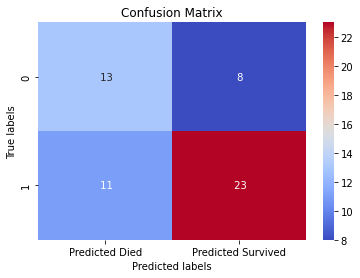

In [20]:
plot_confusion_matrix(Y_test,Y_pred_test)

In [21]:
cr=classification_report(Y_pred_test, Y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.54      0.58        24
           1       0.68      0.74      0.71        31

    accuracy                           0.65        55
   macro avg       0.65      0.64      0.64        55
weighted avg       0.65      0.65      0.65        55

